In [1]:
import pandas as pd 
import numpy as ny 
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

### Read the data

In [3]:
df=pd.read_csv('bands.csv')
df

,bands,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content,band type
1,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
2,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
3,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
4,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,1,1,NaN,40,112.5,100,band
538,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,0,0,NaN,40,110,100,band
539,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,2.7,2.8,NaN,40,108,100,band
540,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,1.5,2.3,NaN,40,108,100,band


### drop redundant columns

In [5]:
df.columns = df.iloc[0]
df = df.drop(0)
df

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content,band type
1,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
2,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
3,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
4,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
5,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,1,1,NaN,40,112.5,100,band
538,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,0,0,NaN,40,110,100,band
539,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,2.7,2.8,NaN,40,108,100,band
540,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,NaN,NaN,NaN,1.5,2.3,NaN,40,108,100,band


### Remove null and NAN values

In [6]:
df.isnull()

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content,band type
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,False,False,False,False
540,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,False,False,False,False


In [12]:
df=df.dropna()
df

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content,band type
1,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
2,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
3,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
4,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
5,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,19910817,R6,SHEPLERS,35529,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,41.2,2,0,3,1,34,40,100,100,band
482,19910724,M374,USCAV,35522,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,3,0,3,1,32,40,103.13,100,band
483,19920208,AA1,KMART,34514,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,41.9,1,0,2.5,0.6,35,40,100,100,band
484,19920207,AA17,KMART,34514,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,41.9,1,0,2.5,0.3,35,40,109.9,100,band


In [13]:
df.isnull().sum()

0
timestamp               0
cylinder                0
customer                0
job number              0
grain screened          0
ink color               0
proof on ctd ink        0
blade mfg               0
cylinder division       0
 paper type             0
ink type:               0
direct steam            0
solvent type            0
type on cylinder        0
press type              0
press                   0
unit number             0
cylinder size           0
 paper mill location    0
plating tank            0
proof cut               0
viscosity               0
caliper                 0
ink temperature:        0
humifity                0
roughness               0
blade pressure          0
varnish pct:            0
press speed             0
ink pct                 0
solvent pct             0
ESA Voltage:            0
ESA Amperage            0
wax                     0
hardener                0
roller durometer:       0
current density         0
 anode space ratio      0
chrome con

In [14]:
df.describe()

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content,band type
count,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
unique,236,377,62,214,3,1,3,3,1,2,...,115,17,4,30,27,11,7,61,2,2
top,19900710,M254,MODMAT,47103,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,41.2,0,0,2.5,1,30,40,100,100,noband
freq,9,5,60,12,264,471,447,466,471,272,...,85,309,466,220,167,124,372,120,454,304


In [15]:
df.head()

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content,band type
1,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
2,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
3,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
4,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
5,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


### Label Encode the data

In [17]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for i in df.columns:
    df[i] = Le.fit_transform(df[i])
    


/var/folders/0b/tr74hg015y1_ck3dbpkf9h0c0000gn/T/ipykernel_14285/2265164026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = Le.fit_transform(df[i])
/var/folders/0b/tr74hg015y1_ck3dbpkf9h0c0000gn/T/ipykernel_14285/2265164026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = Le.fit_transform(df[i])
/var/folders/0b/tr74hg015y1_ck3dbpkf9h0c0000gn/T/ipykernel_14285/2265164026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [19]:
df

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content,band type
1,108,249,55,22,2,0,2,1,0,1,...,41,0,0,20,12,4,4,13,0,0
2,109,286,55,22,2,0,2,1,0,1,...,60,0,0,20,7,4,4,13,0,1
3,107,7,46,207,2,0,2,1,0,1,...,72,0,0,24,11,7,4,12,0,1
4,107,208,44,200,2,0,2,1,0,1,...,62,0,0,20,16,7,4,28,0,1
5,110,143,41,162,1,0,2,1,0,1,...,94,13,0,18,5,5,4,23,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,212,202,52,96,2,0,2,1,0,1,...,83,8,0,27,12,4,4,0,0,0
482,201,166,56,93,2,0,2,1,0,1,...,60,10,0,27,12,2,4,5,0,0
483,234,1,41,54,1,0,2,1,0,1,...,89,3,0,20,5,5,4,0,0,0
484,233,3,41,54,1,0,2,1,0,1,...,89,3,0,20,2,5,4,33,0,0


### Choose target variable and split the data

In [20]:
y=df['band type']
X=df.drop(['band type'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [21]:
x_train

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,ink pct,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content
278,46,145,57,53,0,0,2,1,0,0,...,49,98,0,0,20,11,1,2,0,0
410,99,123,5,197,2,0,2,1,0,1,...,57,83,3,0,20,12,7,4,7,0
148,168,106,21,89,1,0,2,1,0,0,...,63,73,10,0,20,12,1,4,22,0
219,20,372,58,120,1,0,2,1,0,0,...,57,83,14,0,27,8,1,2,0,0
245,32,214,44,132,2,0,2,1,0,1,...,57,83,8,0,20,4,7,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,16,91,15,117,2,0,2,1,0,0,...,69,60,0,0,26,13,3,2,0,0
426,100,277,22,72,1,0,2,1,0,0,...,69,51,3,0,20,14,1,4,19,0
226,24,33,12,191,2,0,2,1,0,1,...,24,47,0,0,26,11,4,2,0,0
280,43,299,4,65,1,0,2,0,0,0,...,57,83,11,0,20,11,3,2,55,0


In [22]:
x_test

,timestamp,cylinder,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,ink pct,solvent pct,ESA Voltage:,ESA Amperage,wax,hardener,roller durometer:,current density,anode space ratio,chrome content
14,117,355,27,2,2,0,2,1,0,1,...,61,76,0,0,14,12,7,4,0,0
366,80,115,34,75,1,0,2,1,0,1,...,61,73,1,0,21,13,5,4,54,0
465,226,240,28,144,1,0,2,1,0,0,...,57,83,0,0,20,12,3,4,34,0
349,72,315,4,66,1,0,2,1,0,0,...,24,28,0,0,20,12,3,4,35,0
18,119,49,35,196,1,0,2,1,0,0,...,57,31,0,0,20,21,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,143,319,4,149,1,0,2,1,0,0,...,44,63,0,0,2,8,3,4,31,0
339,68,116,41,126,1,0,2,1,0,1,...,20,28,0,0,20,4,5,4,40,0
132,161,21,41,37,1,0,2,1,0,1,...,40,84,0,0,20,19,3,4,19,0
170,185,284,21,90,1,0,2,1,0,0,...,69,51,0,0,20,7,1,4,34,0


In [23]:
y_train

278    1
410    0
148    1
219    1
245    1
      ..
220    1
426    1
226    1
280    1
368    0
Name: band type, Length: 376, dtype: int64

In [24]:
y_test

14     0
366    1
465    0
349    1
18     1
      ..
73     1
339    0
132    1
170    0
419    0
Name: band type, Length: 95, dtype: int64

### Fit the data in a decision tree classifier

In [25]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(x_train,y_train)

[Text(0.6970108695652174, 0.9615384615384616, 'x[28] <= 48.5\nentropy = 0.935\nsamples = 376\nvalue = [132, 244]'),
 Text(0.5570652173913043, 0.8846153846153846, 'x[0] <= 217.0\nentropy = 0.984\nsamples = 291\nvalue = [124, 167]'),
 Text(0.41847826086956524, 0.8076923076923077, 'x[14] <= 2.5\nentropy = 0.967\nsamples = 274\nvalue = [108, 166]'),
 Text(0.20652173913043478, 0.7307692307692307, 'x[0] <= 66.0\nentropy = 0.901\nsamples = 186\nvalue = [59, 127]'),
 Text(0.08695652173913043, 0.6538461538461539, 'x[0] <= 27.0\nentropy = 0.586\nsamples = 64\nvalue = [9, 55]'),
 Text(0.06521739130434782, 0.5769230769230769, 'x[37] <= 3.0\nentropy = 0.976\nsamples = 22\nvalue = [9, 13]'),
 Text(0.043478260869565216, 0.5, 'x[9] <= 0.5\nentropy = 0.811\nsamples = 12\nvalue = [9, 3]'),
 Text(0.021739130434782608, 0.4230769230769231, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06521739130434782, 0.4230769230769231, 'x[34] <= 8.5\nentropy = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.043

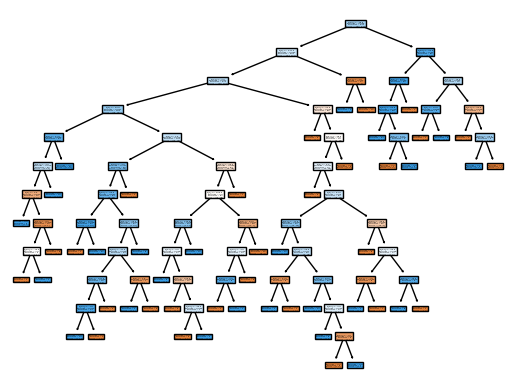

In [26]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf,filled=True)

In [27]:
X_pred = clf.predict(X)
y_pred=clf.predict(x_test)

In [28]:
X_pred == y

1       True
2       True
3       True
4       True
5       True
       ...  
481     True
482     True
483     True
484     True
485    False
Name: band type, Length: 471, dtype: bool

### Print the Confusion Matrix and Classification Report

In [29]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

Accuracy: 0.6947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.63      0.60        35
           1       0.77      0.73      0.75        60

    accuracy                           0.69        95
   macro avg       0.68      0.68      0.68        95
weighted avg       0.70      0.69      0.70        95

Confusion Matrix:
 [[22 13]
 [16 44]]



### Find out the error

In [30]:
r2_score(y_test,y_pred)

-0.3119047619047619

In [31]:
with open('DT3.txt',"w") as f:
   f=tree.export_graphviz(clf,out_file=f)